# 1. Importing Libraries

In [133]:
import os
import numpy as np
import pandas as pd
import ast
from scipy.stats import iqr,yeojohnson, skew, kurtosis
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objs as go

import missingno as msno

import regex as re
import eda_helper_functions
from matplotlib import gridspec
import scipy.stats as stats

In [134]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_colwidth',None)

In [135]:
df = pd.read_csv('mg_cleaned_dataset.csv')


In [136]:
df.head(1)

id  \
0  cardid69429251   

                                                                                                                                        url  \
0  https://www.magicbricks.com/propertydetails/2-bhk-635-sq-ft-multistorey-apartment-for-sale-pokhran-road-in-thane&id=4d423639343239323531   

                                                                                                                                                   image  \
0  https://img.staticmb.com/mbimages/project/photo_h310_w462/2023/04/14/project-photo-6-raymond-realty-ten-x-habitat-thane-5124557_1200_1600_310_462.jpg   

                            address  \
0  pokhran road, thane, maharashtra   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

In [137]:
df.shape

(11902, 49)

### observation 
- dataset consists of 11902 rows and 48 columns

In [138]:
#Columns in our dataset
df.columns

Index(['id', 'url', 'image', 'address', 'image_urls', 'available_units',
       'towers', 'locality_rank', 'locality_rating', 'construction',
       'overlooking', 'ownership', 'extra_rooms', 'bath', 'parking', 'builder',
       'project_name', 'furnish', 'price', 'area', 'costpersqft',
       'property_type', 'status', 'lift', 'flat_on_floor', 'total_floor',
       'balcony', 'facing', 'bed', 'lattitude', 'longitude', 'seller',
       'addressregion', 'price_category', 'amenities_cluster',
       'assigned_amenities_score', 'education', 'transport', 'shopping_centre',
       'commercial_hub', 'hospital', 'tourist', 'room_type', 'emi',
       'project_in_acres', 'flooring_cluster', 'assigned_flooring_score',
       'place', 'extracted_location'],
      dtype='object')

In [139]:
#Description of our dataset
df.describe().T

#T refers to transpose that displays the description of our dataset in long format.

,count,mean,std,min,25%,50%,75%,max
available_units,6676.0,465.475584,1085.788012,6.000000,120.000000,282.000000,550.000000,4.000000e+04
towers,6868.0,4.624199,6.940877,1.000000,1.000000,3.000000,5.000000,2.000000e+02
locality_rank,8063.0,122.406424,126.565803,1.000000,16.000000,92.000000,186.000000,8.390000e+02
locality_rating,11435.0,3.759405,1.067471,0.000000,3.900000,4.000000,4.200000,5.000000e+00
bath,11872.0,2.315027,0.963394,1.000000,2.000000,2.000000,3.000000,1.000000e+01
parking,5662.0,1.392088,0.722071,1.000000,1.000000,1.000000,2.000000,1.200000e+01
price,11902.0,2.907779,4.237299,0.017000,0.950000,1.780000,3.200000,8.000000e+01
area,11897.0,879.253257,697.368865,3.000000,540.000000,730.000000,1036.000000,4.085200e+04
costpersqft,11896.0,28263.439364,51392.570159,147.000000,16909.250000,25577.000000,34286.000000,5.333333e+06
lift,6455.0,3.116809,1.714334,1.000000,2.000000,3.000000,4.000000,1.000000e+01


In [140]:
#Information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11902 entries, 0 to 11901
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        11902 non-null  object 
 1   url                       11902 non-null  object 
 2   image                     11009 non-null  object 
 3   address                   11902 non-null  object 
 4   image_urls                7645 non-null   object 
 5   available_units           6676 non-null   float64
 6   towers                    6868 non-null   float64
 7   locality_rank             8063 non-null   float64
 8   locality_rating           11435 non-null  float64
 9   construction              10839 non-null  object 
 10  overlooking               7932 non-null   object 
 11  ownership                 8290 non-null   object 
 12  extra_rooms               6598 non-null   object 
 13  bath                      11872 non-null  float64
 14  parkin

### observation
- Our dataset features consists of three datatypes
  - float
  - integer
  - object
- Of which total numerical features are 22
- And categorical features are 27.
- some features datatype is incorrect, data type should be 'object' for this features : amenities_cluster , flooring_cluster

In [141]:
# change feature datatypes as object : amenities_cluster , flooring_cluster
df['flooring_cluster'] = df['flooring_cluster'].astype(str)
df['amenities_cluster'] = df['amenities_cluster'].astype(str)

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11902 entries, 0 to 11901
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        11902 non-null  object 
 1   url                       11902 non-null  object 
 2   image                     11009 non-null  object 
 3   address                   11902 non-null  object 
 4   image_urls                7645 non-null   object 
 5   available_units           6676 non-null   float64
 6   towers                    6868 non-null   float64
 7   locality_rank             8063 non-null   float64
 8   locality_rating           11435 non-null  float64
 9   construction              10839 non-null  object 
 10  overlooking               7932 non-null   object 
 11  ownership                 8290 non-null   object 
 12  extra_rooms               6598 non-null   object 
 13  bath                      11872 non-null  float64
 14  parkin

### observation 
- total numerical features are 20
- total categorical features are 29

# User-Defined Functions

Function to analyze missing values and summary statistics of a given column

In [143]:
def analyze_column(df, feature):
    print(f"Missing Values in '{feature}': {df[feature].isnull().sum()}")
    print("-" * 50)

    if df[feature].dtype in ["float64", "int64"]:  # Numerical columns
        print(df[feature].describe())
    elif df[feature].dtype in ["object","category"]:  # Categorical columns
        print(df[feature].value_counts())

Function to visualize the distribution of a numerical feature using Histogram, QQ Plot, and Box Plot

In [144]:
def num_three_chart_plot(df, feature):
    fig = plt.figure(constrained_layout=True, figsize=(20, 8))
    grid = gridspec.GridSpec(ncols=4, nrows=6, figure=fig)

    ax1 = fig.add_subplot(grid[0:3, :3])  # Increase histogram height
    ax1.set_title('Histogram')
    sns.histplot(df[feature], kde=True, ax=ax1)
    ax1.axvline(x=df[feature].mean(), c='red', label="Mean")
    ax1.axvline(x=df[feature].median(), c='green', label="Median")
    ax1.legend()

    ax2 = fig.add_subplot(grid[3:6, :3])  # Increase probability plot height
    ax2.set_title('QQ Plot')
    stats.probplot(df[feature], plot=ax2)

    ax3 = fig.add_subplot(grid[:, 3])
    ax3.set_title('Box Plot')
    sns.boxplot(y=df[feature], ax=ax3)

    plt.show()

Bar Plot and pie chart Function

In [166]:
def bar_pie_chart_plot(df, feature, top_n=5):
    fig = plt.figure(constrained_layout=True, figsize=(25, 6))
    grid = gridspec.GridSpec(ncols=2, nrows=1, figure=fig)  # 2 columns: Bar plot + Pie chart

    # Get value counts and sort in descending order
    value_counts = df[feature].value_counts().sort_values(ascending=False)

    # Bar Chart Data (All categories, sorted)
    bar_data = value_counts.reset_index()
    bar_data.columns = [feature, 'count']

    # Pie Chart Data (Top N categories + "Others")
    if len(value_counts) > top_n:
        top_values = value_counts.iloc[:top_n]  # Keep only top N categories
        others_sum = value_counts.iloc[top_n:].sum()  # Sum of remaining categories
        pie_data = pd.concat([top_values, pd.Series({'Others': others_sum})])  # Add "Others"
    else:
        pie_data = value_counts

    # Sort pie_data **again** after adding "Others" to maintain descending order
    pie_data = pie_data.reset_index()
    pie_data.columns = [feature, 'count']
    pie_data = pie_data.sort_values(by="count", ascending=False)  # Ensure sorting

    # Bar Chart (Sorted)
    ax1 = fig.add_subplot(grid[0, 0]) 
    ax1.set_title(f'{feature} Distribution - Bar Chart', fontsize=14)

    # Ensure bar chart data is **sorted** before plotting
    bar_data = bar_data.sort_values(by='count', ascending=False)

    sns.barplot(x=feature, y='count', data=bar_data, ax=ax1, order=bar_data[feature], 
                palette='tab10', edgecolor='black')

    # Add count labels on top of bars
    for p in ax1.patches:
        ax1.annotate(f'{int(p.get_height())}', 
                     (p.get_x() + p.get_width() / 2, p.get_height()), 
                     ha='center', va='bottom', fontsize=12, color='black')

    ax1.set_xticks(range(len(bar_data[feature])))  # Explicitly set ticks
    ax1.set_xticklabels(bar_data[feature], rotation=45)  # Set tick labels
    ax1.grid(axis="y", linestyle="--", alpha=0.7)
    ax1.set_ylabel("Count")

    # Pie Chart (Sorted)
    ax2 = fig.add_subplot(grid[0, 1]) 
    ax2.set_title(f'{feature} Distribution - Pie Chart (Top {top_n} + Others)', fontsize=14)

    ax2.pie(pie_data['count'], labels=pie_data[feature], autopct='%1.1f%%', colors=sns.color_palette('tab10'), 
            wedgeprops={'edgecolor': 'black'})

    plt.show()

function calculates skewness, kurtosis, quartiles (Q1 & Q3), interquartile range (IQR), lower & upper whiskers, and user-specified quantiles for a given numerical feature in a DataFrame.

In [146]:
def analyze_distribution(df, feature, quantiles_input):
    # Calculate skewness and kurtosis
    skewness = df[feature].skew()
    kurtosis = df[feature].kurt()
    
    print(f"skewness : {skewness:.6f}")
    print(f"kurtosis : {kurtosis:.6f}")
    print("-" * 68)
    
    # Drop NaN values for percentile calculations
    cleaned_data = df[feature].dropna()

    # Calculate Q1, Q3, and IQR
    Q1 = np.percentile(cleaned_data, 25)
    Q3 = np.percentile(cleaned_data, 75)
    IQR = Q3 - Q1
    
    # Calculate lower and upper whiskers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    print(f"Q1 (25th percentile): {Q1:.4f}")
    print(f"Q3 (75th percentile): {Q3:.4f}")
    print(f"IQR: {IQR:.4f}")
    print(f"Lower bound: {lower_bound:.4f}")
    print(f"Upper bound: {upper_bound:.4f}")
    print("-" * 68)

    # Quantile Analysis
    quantiles = df[feature].quantile(quantiles_input)

    for q, value in quantiles.items():
        print(f"{int(q*100)}th percentile   {value:.4f}")

### Let's first analyze the target column, then perform univariate analysis on numerical columns, and finally examine categorical columns.

# price 

In [147]:
analyze_column(df, 'price')

Missing Values in 'price': 0
--------------------------------------------------
count    11902.000000
mean         2.907779
std          4.237299
min          0.017000
25%          0.950000
50%          1.780000
75%          3.200000
max         80.000000
Name: price, dtype: float64


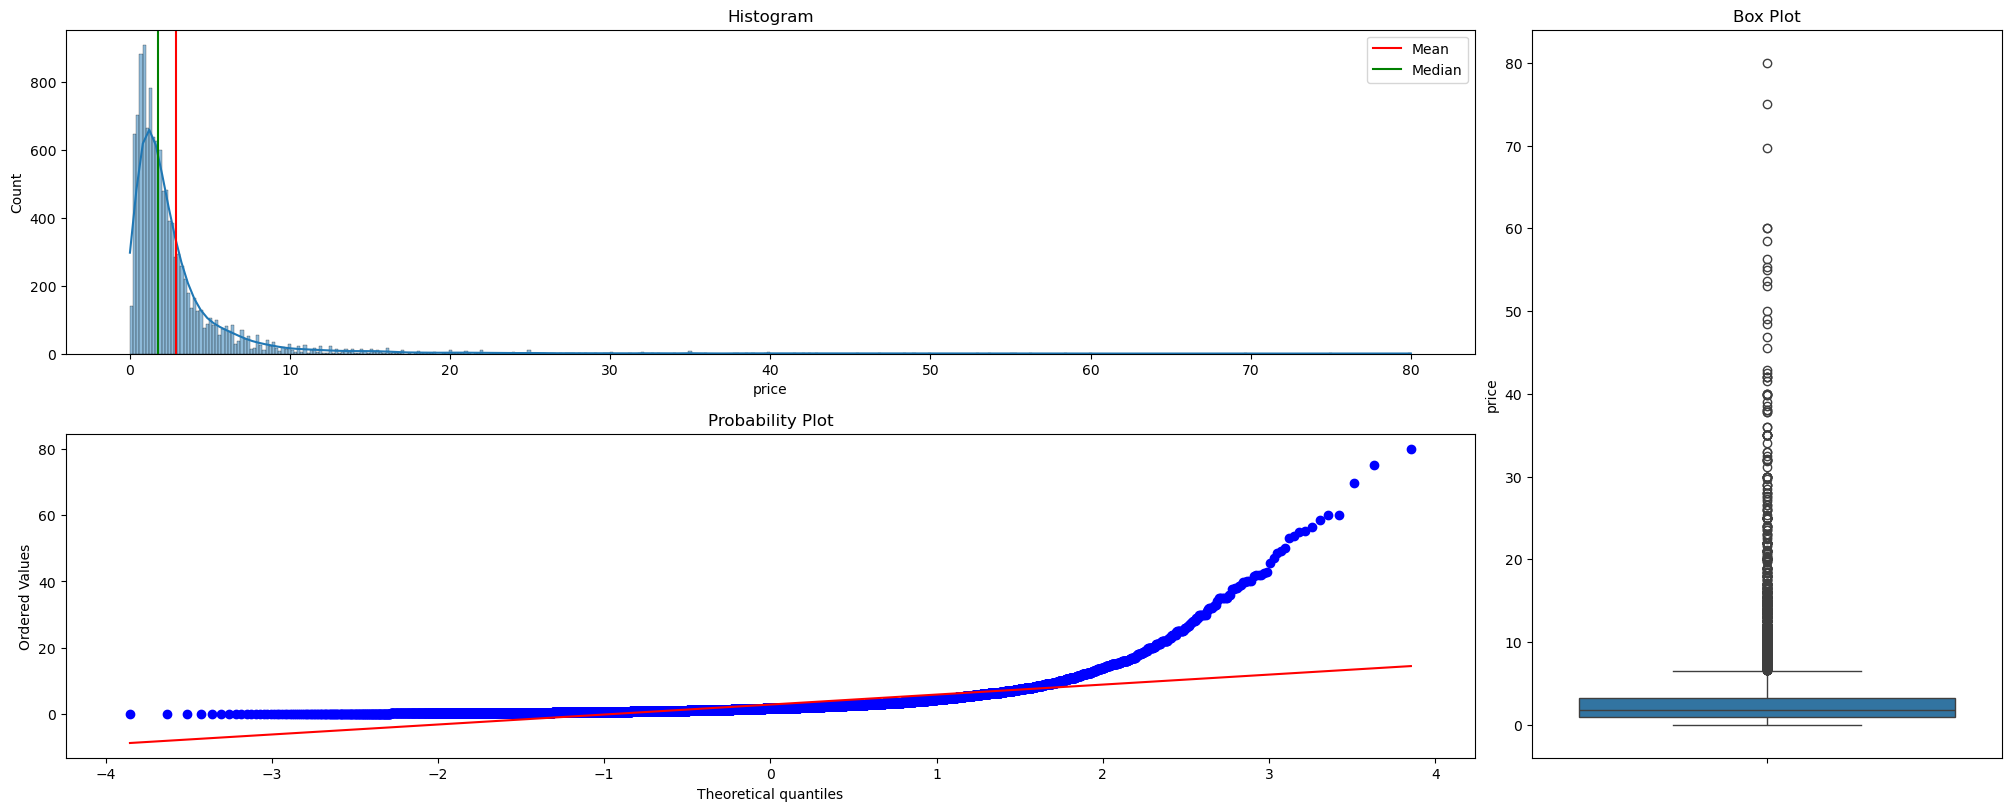

In [148]:
num_three_chart_plot(df, 'price')

In [149]:
quantiles_input = [0.01, 0.05, 0.95, 0.99]  
analyze_distribution(df, 'price', quantiles_input)

skewness : 6.197296
kurtosis : 60.929913
--------------------------------------------------------------------
Q1 (25th percentile): 0.9500
Q3 (75th percentile): 3.2000
IQR: 2.2500
Lower bound: -2.4250
Upper bound: 6.5750
--------------------------------------------------------------------
1th percentile   0.2000
5th percentile   0.3600
95th percentile   8.7500
99th percentile   21.0000


# Univariate analysis on Numerical columns

In [150]:
#find the numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns
print(numerical_columns)
print("-"*100)
print(f'total numerical columns : {len(numerical_columns)}')

Index(['available_units', 'towers', 'locality_rank', 'locality_rating', 'bath',
       'parking', 'price', 'area', 'costpersqft', 'lift', 'flat_on_floor',
       'total_floor', 'balcony', 'bed', 'lattitude', 'longitude',
       'assigned_amenities_score', 'emi', 'project_in_acres',
       'assigned_flooring_score'],
      dtype='object')
----------------------------------------------------------------------------------------------------
total numerical columns : 20


# 1. available_units

In [151]:
analyze_column(df, 'available_units')

Missing Values in 'available_units': 5226
--------------------------------------------------
count     6676.000000
mean       465.475584
std       1085.788012
min          6.000000
25%        120.000000
50%        282.000000
75%        550.000000
max      40000.000000
Name: available_units, dtype: float64


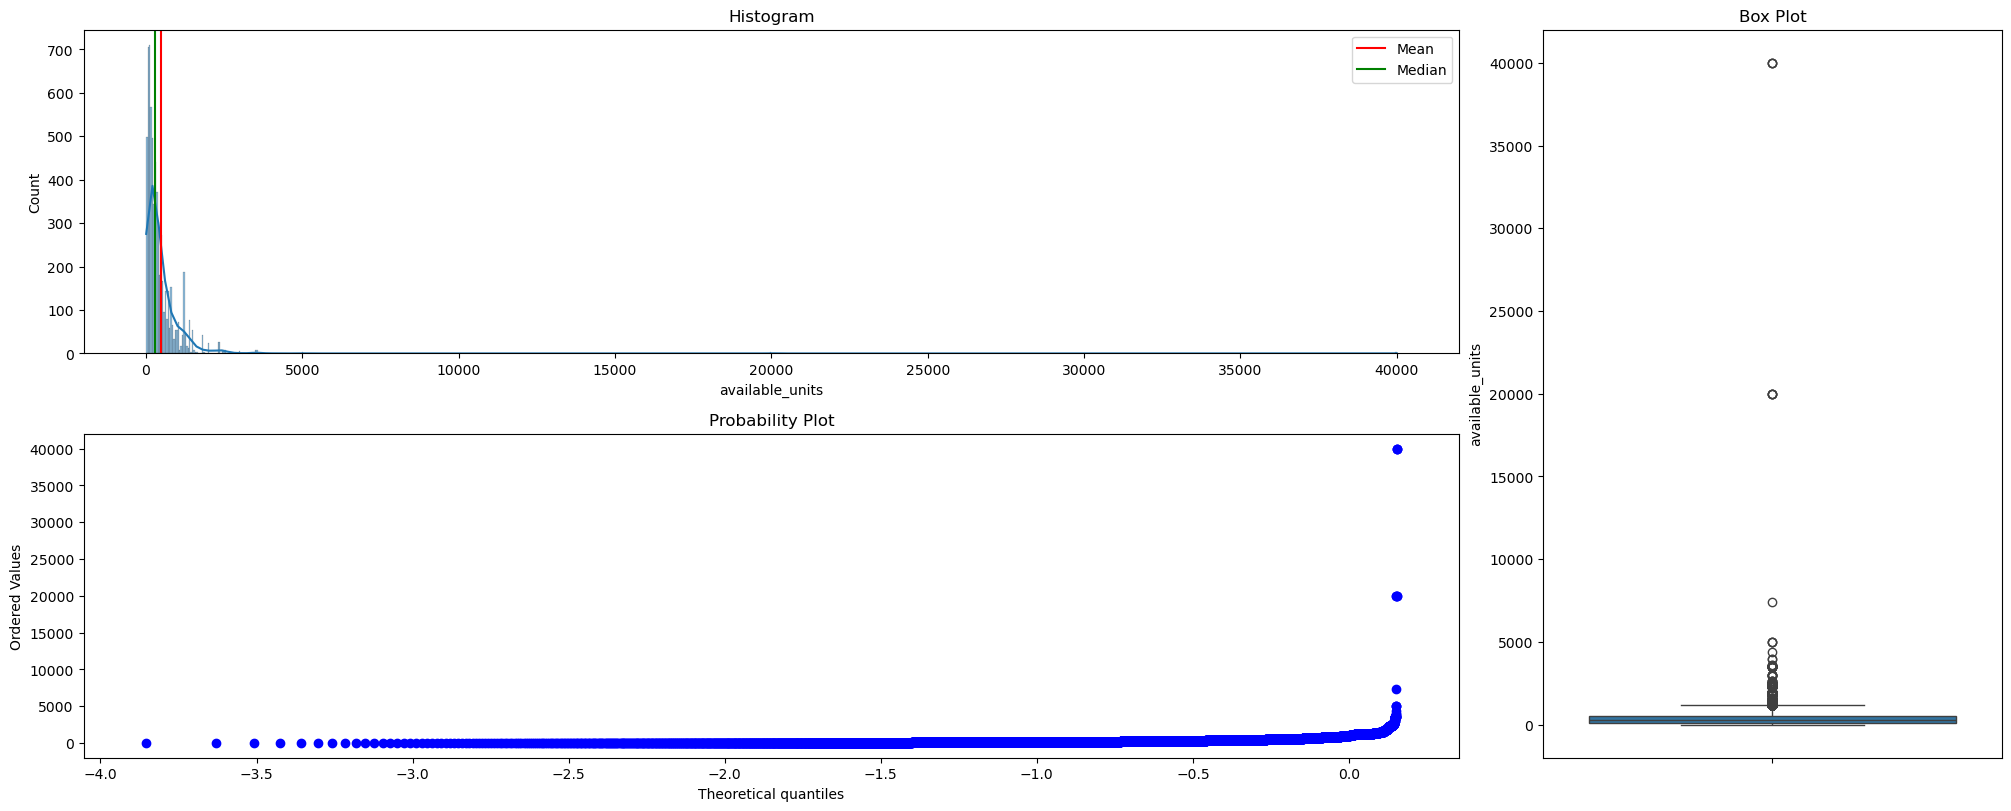

In [152]:
num_three_chart_plot(df, 'available_units')

In [153]:
quantiles_input = [0.10, 0.75]  
analyze_distribution(df, 'available_units', quantiles_input)

skewness : 25.469442
kurtosis : 851.328151
--------------------------------------------------------------------
Q1 (25th percentile): 120.0000
Q3 (75th percentile): 550.0000
IQR: 430.0000
Lower bound: -525.0000
Upper bound: 1195.0000
--------------------------------------------------------------------
10th percentile   58.0000
75th percentile   550.0000


# towers

In [154]:
analyze_column(df, 'towers')

Missing Values in 'towers': 5034
--------------------------------------------------
count    6868.000000
mean        4.624199
std         6.940877
min         1.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       200.000000
Name: towers, dtype: float64


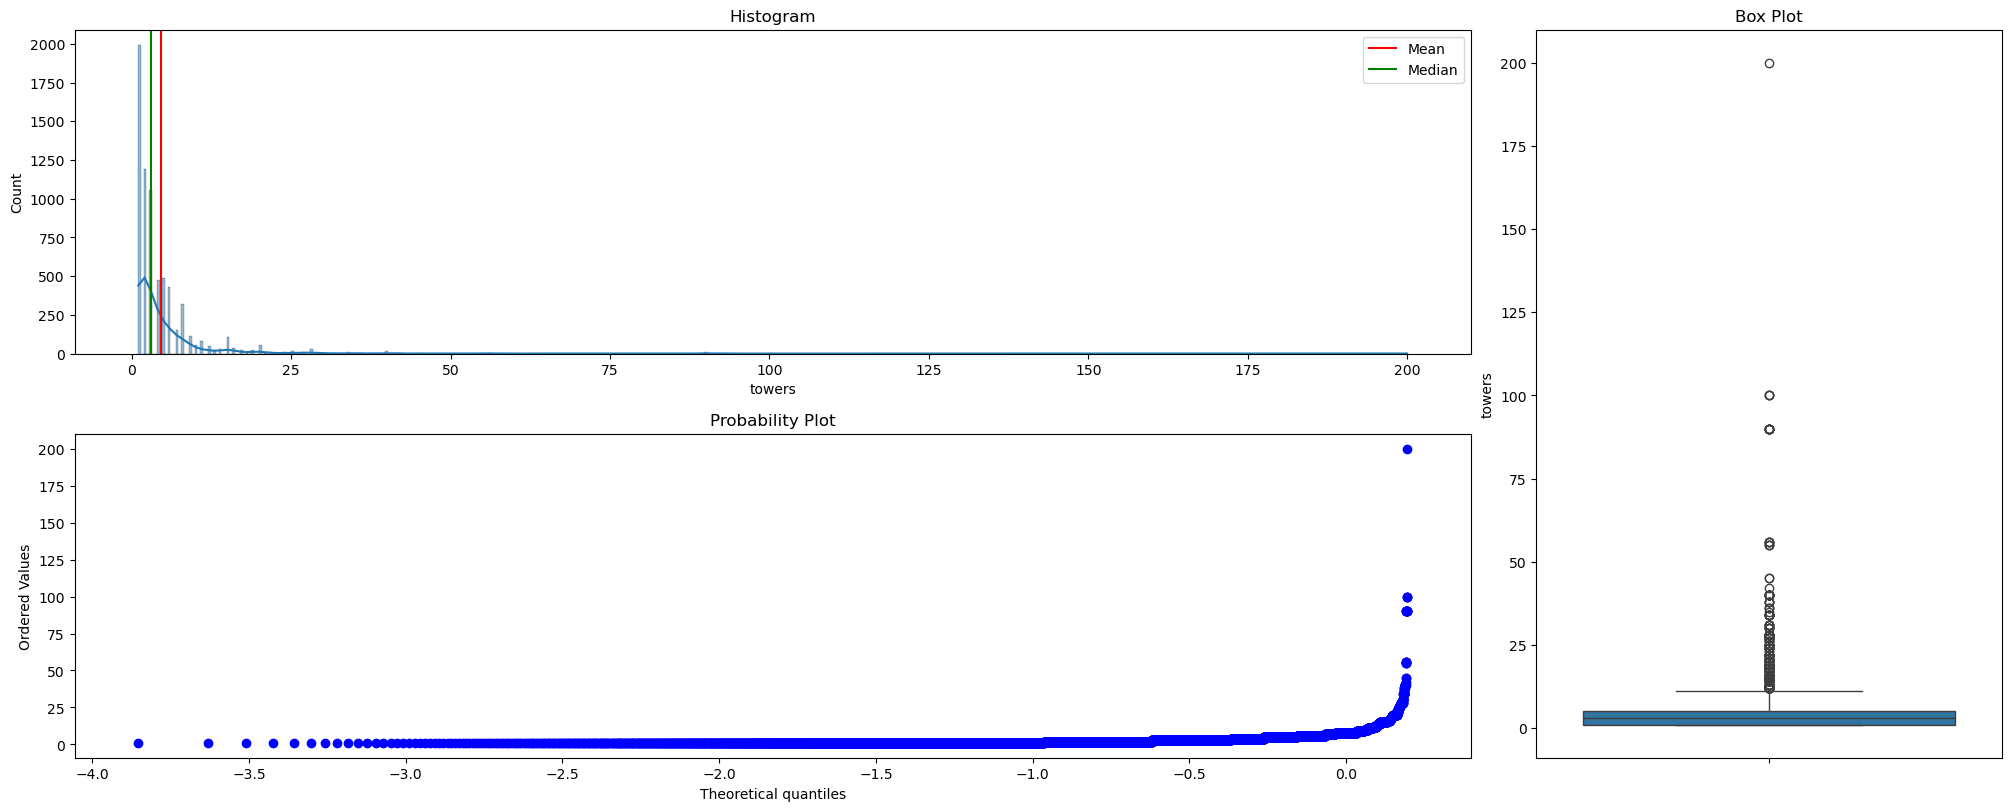

In [155]:
num_three_chart_plot(df, 'towers')

C:\Users\ABC\AppData\Local\Temp\ipykernel_2516\1742223979.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='count', data=bar_data, ax=ax1, order=bar_data[feature],


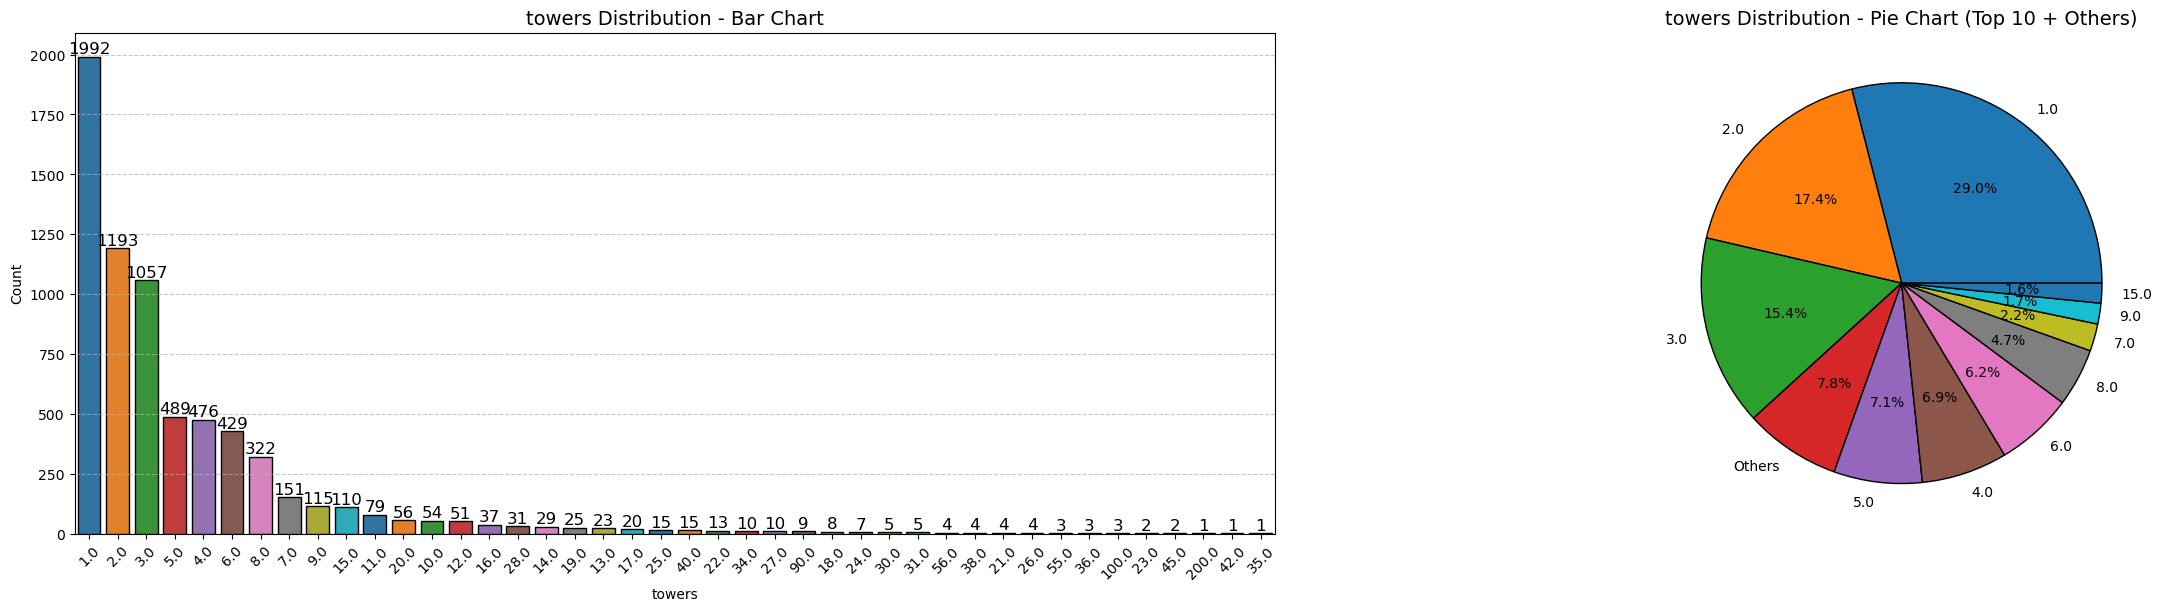

In [168]:
bar_pie_chart_plot(df, 'towers', top_n=10) 

In [159]:
quantiles_input = [0.10, 0.75]  
analyze_distribution(df, 'towers', quantiles_input)

skewness : 8.476354
kurtosis : 141.936226
--------------------------------------------------------------------
Q1 (25th percentile): 1.0000
Q3 (75th percentile): 5.0000
IQR: 4.0000
Lower bound: -5.0000
Upper bound: 11.0000
--------------------------------------------------------------------
10th percentile   1.0000
75th percentile   5.0000
